# **📒 Google Colab Code – PCA, t-SNE, UMAP on MNIST**

**Install Required Libraries**

In [ ]:
# Install UMAP (not included in sklearn)
!pip install umap-learn

**Import Libraries**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap.umap_ as umap

**Load Dataset**

In [ ]:
# Fetch MNIST dataset (70k samples, 784 features)
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist['data'], mnist['target']

print("Shape of data:", X.shape)
print("Shape of labels:", y.shape)

Shape of data: (70000, 784)
Shape of labels: (70000,)


**Preprocessing**

In [ ]:
# Scale features (important for PCA/t-SNE/UMAP)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Use a subset (for faster t-SNE/UMAP)
n_samples = 10000
X_subset = X_scaled[:n_samples]
y_subset = y[:n_samples]

print("Subset shape:", X_subset.shape)

Subset shape: (10000, 784)


**PCA Implementation**

Explained variance ratio: 0.10193842649168043


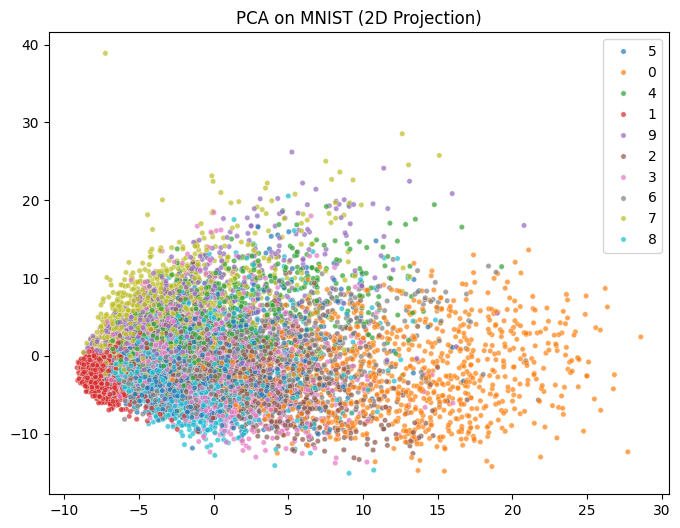

In [ ]:
# Reduce to 2D using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_subset)

print("Explained variance ratio:", pca.explained_variance_ratio_.sum())

# Visualization
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=y_subset,
                palette="tab10", s=15, alpha=0.7)
plt.title("PCA on MNIST (2D Projection)")
plt.show()

**t-SNE Implementation**

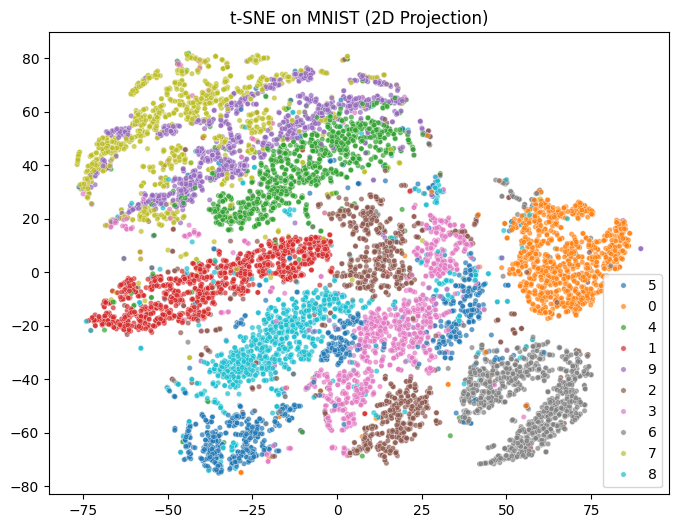

In [ ]:
# Reduce to 2D using t-SNE
tsne = TSNE(n_components=2, perplexity=30, learning_rate=200, random_state=42)
X_tsne = tsne.fit_transform(X_subset)

# Visualization
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_tsne[:,0], y=X_tsne[:,1], hue=y_subset,
                palette="tab10", s=15, alpha=0.7)
plt.title("t-SNE on MNIST (2D Projection)")
plt.show()

**UMAP Implementation**

/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


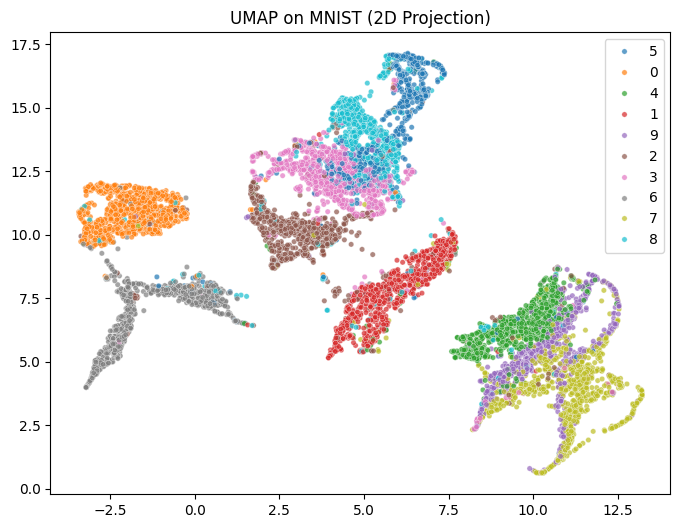

In [ ]:
# Reduce to 2D using UMAP
umap_model = umap.UMAP(n_components=2, n_neighbors=15, min_dist=0.1, random_state=42)
X_umap = umap_model.fit_transform(X_subset)

# Visualization
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_umap[:,0], y=X_umap[:,1], hue=y_subset,
                palette="tab10", s=15, alpha=0.7)
plt.title("UMAP on MNIST (2D Projection)")
plt.show()

**Evaluation & Comparison**

In [ ]:
# Quantitative evaluation using kNN classification accuracy
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

def evaluate_embeddings(X_embedded, y_labels, method_name):
    X_train, X_test, y_train, y_test = train_test_split(X_embedded, y_labels, test_size=0.3, random_state=42)
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{method_name} → kNN accuracy: {acc:.4f}")

evaluate_embeddings(X_pca, y_subset, "PCA")
evaluate_embeddings(X_tsne, y_subset, "t-SNE")
evaluate_embeddings(X_umap, y_subset, "UMAP")

PCA → kNN accuracy: 0.3473
t-SNE → kNN accuracy: 0.8997
UMAP → kNN accuracy: 0.8653
